<a href="https://colab.research.google.com/github/Madhusri02/Predicting-number-MSIE-images/blob/Sub_branch/MSIE_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
%matplotlib inline


In [ ]:
digits = load_digits()

To determine the total number of images and labels


In [ ]:
digits.data.shape
digits.target.shape

(1797,)

Displaying some of the images and its labels

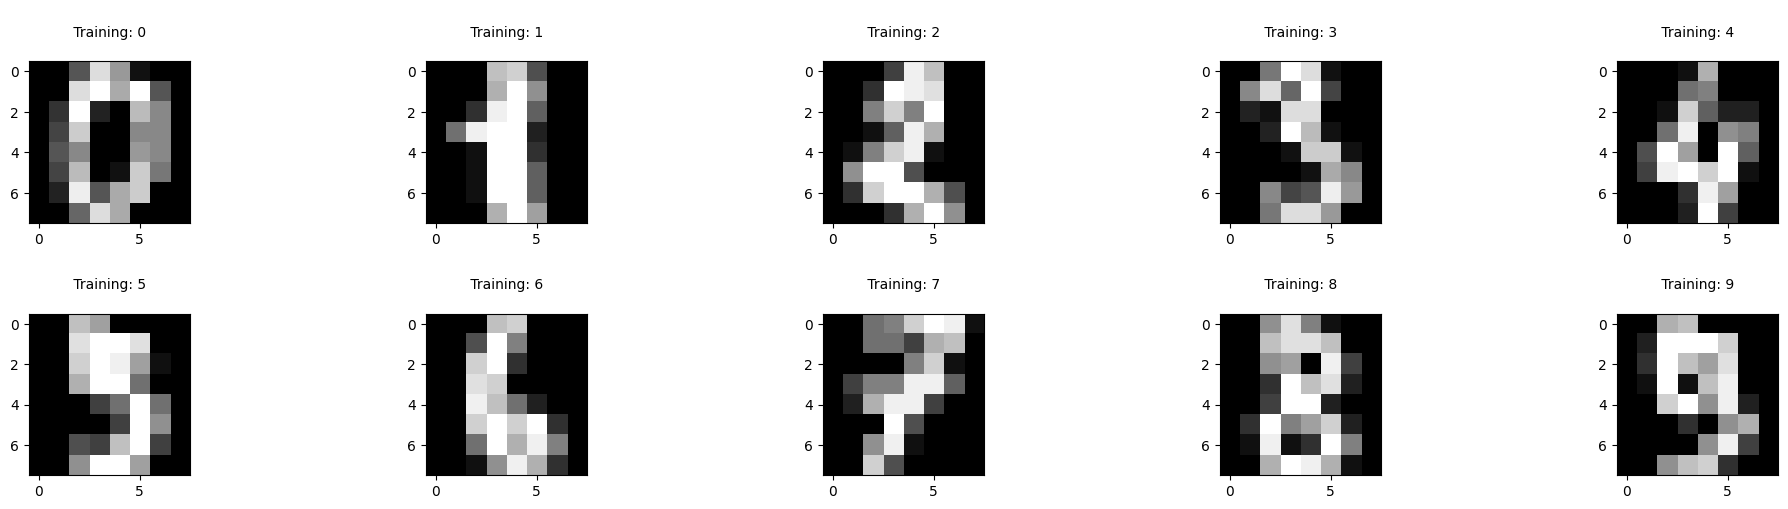

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
for index , (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
  plt.subplot(4,5,index + 1 )
  plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray)
  plt.title('\n Training: %i \n' %label, fontsize = 10)
plt.tight_layout()
plt.show()

dividing dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(digits.data, digits.target , test_size= 0.23 , random_state=2)

In [ ]:
x_train.shape

(1383, 64)

In [ ]:
y_train.shape

(1383,)

In [ ]:
x_test.shape

(414, 64)

In [ ]:
y_test.shape

(414,)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.predict(x_test[0].reshape(1,-1))

array([4])

In [ ]:
l=lr.predict(x_test[0:20])

In [ ]:

accuracy= lr.score(x_test,y_test)
accuracy

0.9516908212560387

In [ ]:
import seaborn as sns
from sklearn import metrics
from matplotlib import colormaps

Confusion matrix in heap


In [ ]:
cm=metrics.confusion_matrix(l,y_test[0:20])
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 4, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 3, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1]])

Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

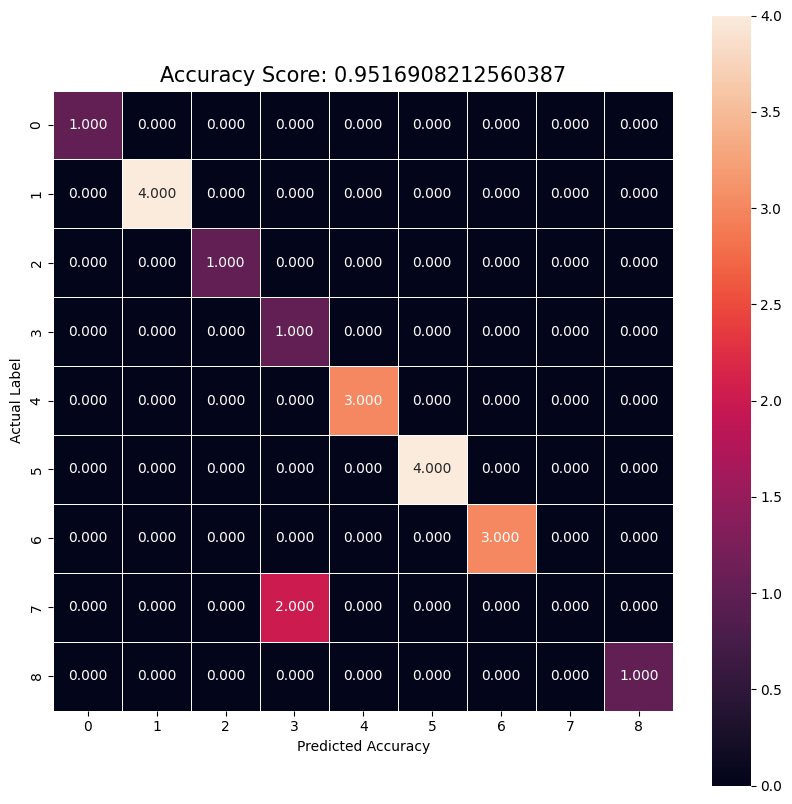

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm , annot= True , fmt=".3f" , linewidths= .5 , square= True , cmap=None);
plt.ylabel('Actual Label');
plt.xlabel('Predicted Accuracy')
title='Accuracy Score: {0}'.format(accuracy)
plt.title(title, size=15)

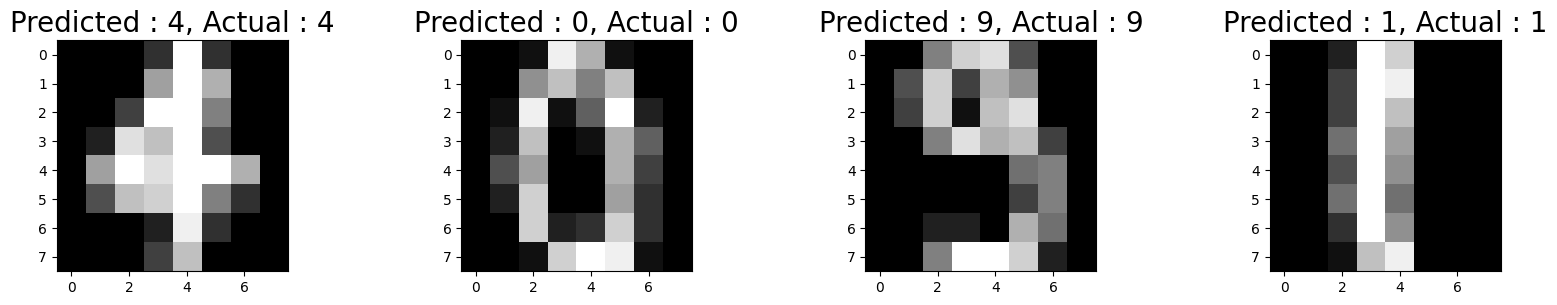

In [ ]:
index=0
out_index=[]

for i,j in zip(l, y_test):
  if i==j:
    out_index.append(index)
  index+=1

plt.figure(figsize=(20,3))
for i,j in enumerate(out_index[0:4]):
  plt.subplot(1,4,i+1)
  plt.imshow(np.reshape(x_test[j], (8,8)),cmap=plt.cm.gray)
  plt.title("Predicted : {}, Actual : {}".format(l[j],y_test[j]), fontsize=20)